## Load Data

In [59]:
import pandas as pd
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [60]:
women_clothes_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

women_clothes_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Concatenate the 'Title', 'Review Text', 'Division Name', 'Department Name', and 'Class Name' as a New Feature of 'Reviews'

In [61]:
women_clothes_df['Reviews'] = women_clothes_df['Title'].astype(str) + ' ' + women_clothes_df['Review Text'].astype(str) + ' ' + women_clothes_df['Division Name'].astype(str) + ' ' + women_clothes_df['Department Name'].astype(str) + ' ' + women_clothes_df['Class Name'].astype(str)

women_clothes_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,nan Absolutely wonderful - silky and sexy and ...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,nan Love this dress! it's sooo pretty. i hap...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


## Clean the New Feature of 'Reviews' using Regular Expressions

In [62]:
# def clean_text(text):
#     # Remove non-alphanumeric characters and extra whitespaces
#     text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

#     # Convert to lowercase
#     text = text.lower()
#     return text

# women_clothes_df['Reviews'] = women_clothes_df['Reviews'].apply(clean_text)

# women_clothes_df.head()

# Remove all special characters, punctuation and spaces
women_clothes_df['Reviews'] = women_clothes_df['Reviews'].apply(lambda x: re.sub(r'[^A-Za-z0-9]+',' ',x))

# Replace special characters, ','  in the file
women_clothes_df['Reviews'] = women_clothes_df['Reviews'].str.replace(',', '')

# # Remove length <=2
# women_clothes_df['Reviews'] = women_clothes_df['Reviews'].apply(lambda x: re.sub(r'\b[a-zA-Z]{1,2}\b', '', x))

women_clothes_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,nan Absolutely wonderful silky and sexy and co...
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,nan Love this dress it s sooo pretty i happene...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,My favorite buy I love love love this jumpsuit...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


## Build an RNN model to Forecast the 'Recommended IND' based on 'Reviews' using TensorFlow

In [63]:
women_clothes_df.isnull().sum(axis = 0)

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
Reviews                       0
dtype: int64

In [64]:
women_clothes_df = women_clothes_df.dropna(axis = 0)
women_clothes_df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,My favorite buy I love love love this jumpsuit...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,Great dress for many occasions I was very happ...
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,Wish it was made of cotton It reminds me of ma...
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,Cute but see through This fit well but the top...
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,Very cute dress perfect for summer parties and...


In [65]:
women_clothes_df.isnull().sum(axis = 0)

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Reviews                    0
dtype: int64

In [66]:
label_encoder = LabelEncoder()

women_clothes_df['Recommended IND'] = label_encoder.fit_transform(women_clothes_df['Recommended IND'])

women_clothes_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Reviews
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,My favorite buy I love love love this jumpsuit...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...


In [67]:
X = women_clothes_df['Reviews'].values
y = women_clothes_df['Recommended IND'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

print(f"X Train Shape: {X_train.shape}, \n X Test Shape: {X_test.shape}")
print(f"y Train Shape: {y_train.shape}, \n y Test Shape: {y_test.shape}")

X Train Shape: (15729,), 
 X Test Shape: (3933,)
y Train Shape: (15729,), 
 y Test Shape: (3933,)


In [68]:
# Specify the vocab size
VOCAB_SIZE = 20000

# Perform textvectorization
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE)

# Fits the state of the preprocessing layer to the dataset.
encoder.adapt(X_train)

In [69]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'i', 'and', 'it', 'a', 'is', 'this', 'to',
       'in', 'general', 'but', 'on', 'for', 'of', 'with', 'so', 'dresses',
       'was'], dtype='<U21')

In [70]:
model = tf.keras.Sequential([
    # Convert review text to indices
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    #
    tf.keras.layers.GRU(128, return_sequences=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    # Binary classifier
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [71]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [72]:
%%time
history = model.fit(x=X_train,y=y_train,batch_size= 32,epochs=5,
          validation_data=(X_test,y_test), verbose= 1
          )

Epoch 1/5
492/492 [==============================] - 361s 695ms/step - loss: 0.3580 - accuracy: 0.8055 - val_loss: 0.2249 - val_accuracy: 0.8932
Epoch 2/5
492/492 [==============================] - 353s 718ms/step - loss: 0.1862 - accuracy: 0.9182 - val_loss: 0.2125 - val_accuracy: 0.9067
Epoch 3/5
492/492 [==============================] - 332s 675ms/step - loss: 0.1538 - accuracy: 0.9362 - val_loss: 0.2056 - val_accuracy: 0.9163
Epoch 4/5
492/492 [==============================] - 331s 674ms/step - loss: 0.1331 - accuracy: 0.9470 - val_loss: 0.2177 - val_accuracy: 0.9133
Epoch 5/5
492/492 [==============================] - 356s 724ms/step - loss: 0.1187 - accuracy: 0.9542 - val_loss: 0.2154 - val_accuracy: 0.9113
CPU times: user 41min 47s, sys: 1min 54s, total: 43min 42s
Wall time: 28min 54s


## Evaluating the Model

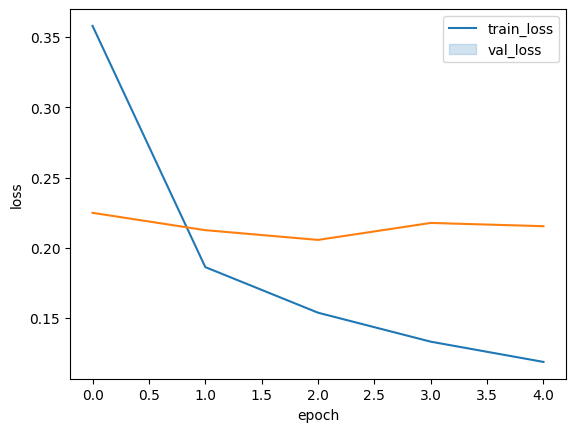

In [73]:
## Evaluate the Model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

train_history = pd.DataFrame(history.history)
train_history['epoch'] = history.epoch
# Plot train loss
sns.lineplot(x='epoch', y ='loss', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_loss', data =train_history)
# Add legends
plt.legend(labels=['train_loss', 'val_loss'])

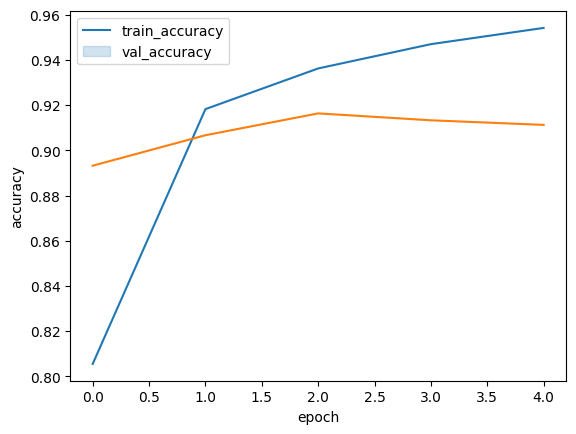

In [74]:
sns.lineplot(x='epoch', y ='accuracy', data =train_history)
# Plot validation loss
sns.lineplot(x='epoch', y ='val_accuracy', data =train_history)
# Add legends
plt.legend(labels=['train_accuracy', 'val_accuracy'])

In [75]:
# the cutoff probability is 50%
y_pred = (model.predict(X_test)> 0.5).astype(int)

123/123 [==============================] - 28s 184ms/step


In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 597,  118],
       [ 231, 2987]])

In [77]:
from sklearn.metrics import classification_report
label_names = ['negative', 'positive']
print(classification_report(y_test, y_pred, target_names=label_names))

              precision    recall  f1-score   support

    negative       0.72      0.83      0.77       715
    positive       0.96      0.93      0.94      3218

    accuracy                           0.91      3933
   macro avg       0.84      0.88      0.86      3933
weighted avg       0.92      0.91      0.91      3933



### I recommend this model because the F1-score for Accuracy is 91%. In addition to the F1-score for Positive Reviews is at 94% and F1-score for Negative Reviews is 77%.